EDA (Exploratory Data Analysis) is a critical step in the data analysis process where analysts and data scientists examine datasets to summarize their main characteristics, often using visual and statistical methods. EDA aims to uncover patterns, spot anomalies, test hypotheses, and check assumptions, thus helping in better understanding the data before applying modeling or more advanced analytics.

Key features of EDA are:
* Understanding the Data
* Handling Missing and Anomalous Data
* Univariate Analysis
* Bivariate Analysis
* Multivariate Analysis
* Data Visualization
* Outlier Detection
* Feature Engineering
* Data Cleaning
* Insights and Hypotheses



In [ ]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#importing data in colab
from google.colab import files
uploaded = files.upload()

Saving Top 1000 IMDB movies (1).csv to Top 1000 IMDB movies (1).csv


In [ ]:
#loading the data
df = pd.read_csv("Top 1000 IMDB movies (1).csv")

In [ ]:
df.head()

,Unnamed: 0,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,0,The Shawshank Redemption,(1994),142 min,9.3,81,"34,709",$28.34M,Two imprisoned men bond over a number of years...
1,1,The Godfather,(1972),175 min,9.2,100,"34,709",$134.97M,The aging patriarch of an organized crime dyna...
2,2,The Dark Knight,(2008),152 min,9.0,84,"34,709",$534.86M,When the menace known as the Joker wreaks havo...
3,3,The Lord of the Rings: The Return of the King,(2003),201 min,9.0,94,"34,709",$377.85M,Gandalf and Aragorn lead the World of Men agai...
4,4,Schindler's List,(1993),195 min,9.0,94,"34,709",$96.90M,"In German-occupied Poland during World War II,..."


In [ ]:
#checking the numbers of rows and columns in the dataset
print('There are {} rows and {} columns in Top 1000 IMDB movies (1).csv'.format(df.shape[0],df.shape[1]))

There are 1000 rows and 9 columns in Top 1000 IMDB movies (1).csv


In [ ]:
#dropping (deleting) unwanted columns
df=df.drop(columns=["Unnamed: 0"])

In [ ]:
# checking null values
df.isnull().sum()

,0
Movie Name,0
Year of Release,0
Watch Time,0
Movie Rating,0
Meatscore of movie,0
Votes,0
Gross,0
Description,0


In [ ]:
# Cleaning the 3rd column (Year of Release)
df['Year of Release'] = df['Year of Release'].str.extract(r'(\d{4})').astype(int)

# Cleaning the 4th column (Watch Time)
df['Watch Time'] = df['Watch Time'].str.replace(' min', '').astype(int)

# Cleaning the 6th column (Meatscore of movie)
df['Meatscore of movie'] = pd.to_numeric(df['Meatscore of movie'], errors='coerce')

# Cleaning the 8th column (Gross)
df['Gross'] = pd.to_numeric(df['Gross'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [ ]:
df.head()

,Movie Name,Year of Release,Watch Time,Movie Rating,Meatscore of movie,Votes,Gross,Description
0,The Shawshank Redemption,1994,142,9.3,81.0,"34,709",NaN,Two imprisoned men bond over a number of years...
1,The Godfather,1972,175,9.2,100.0,"34,709",NaN,The aging patriarch of an organized crime dyna...
2,The Dark Knight,2008,152,9.0,84.0,"34,709",NaN,When the menace known as the Joker wreaks havo...
3,The Lord of the Rings: The Return of the King,2003,201,9.0,94.0,"34,709",NaN,Gandalf and Aragorn lead the World of Men agai...
4,Schindler's List,1993,195,9.0,94.0,"34,709",NaN,"In German-occupied Poland during World War II,..."


In [ ]:
#if there were any missing values

In [ ]:
'''
# Checking for missing values
print("Missing Values:\n", dataset.isnull().sum())

# Impute missing values for 'Meatscore of movie' (mean imputation)
if dataset['Meatscore of movie'].isnull().sum() > 0:
    dataset['Meatscore of movie'].fillna(dataset['Meatscore of movie'].mean(), inplace=True)

# Drop rows with missing 'Gross' values (assuming it's critical for analysis)
dataset.dropna(subset=['Gross'], inplace=True)

# Detecting anomalies using IQR for 'Gross'
Q1 = dataset['Gross'].quantile(0.25)
Q3 = dataset['Gross'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip 'Gross' values to remove extreme outliers
dataset['Gross'] = dataset['Gross'].clip(lower=lower_bound, upper=upper_bound)

# Handling outliers in 'Votes' using Z-score
from scipy.stats import zscore

# Calculate Z-scores
z_scores = zscore(dataset['Votes'])
abs_z_scores = np.abs(z_scores)

# Remove rows where Z-score > 3
dataset = dataset[abs_z_scores <= 3]

# Rechecking for missing or anomalous values
print("Updated Missing Values:\n", dataset.isnull().sum())
'''

'\n# Checking for missing values\nprint("Missing Values:\n", dataset.isnull().sum())\n\n# Impute missing values for \'Meatscore of movie\' (mean imputation)\nif dataset[\'Meatscore of movie\'].isnull().sum() > 0:\n    dataset[\'Meatscore of movie\'].fillna(dataset[\'Meatscore of movie\'].mean(), inplace=True)\n\n# Drop rows with missing \'Gross\' values (assuming it\'s critical for analysis)\ndataset.dropna(subset=[\'Gross\'], inplace=True)\n\n# Detecting anomalies using IQR for \'Gross\'\nQ1 = dataset[\'Gross\'].quantile(0.25)\nQ3 = dataset[\'Gross\'].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define lower and upper bounds\nlower_bound = Q1 - 1.5 * IQR\nupper_bound = Q3 + 1.5 * IQR\n\n# Clip \'Gross\' values to remove extreme outliers\ndataset[\'Gross\'] = dataset[\'Gross\'].clip(lower=lower_bound, upper=upper_bound)\n\n# Handling outliers in \'Votes\' using Z-score\nfrom scipy.stats import zscore\n\n# Calculate Z-scores\nz_scores = zscore(dataset[\'Votes\'])\nabs_z_scores = np.abs(z_scores)\

In [ ]:
# visualization

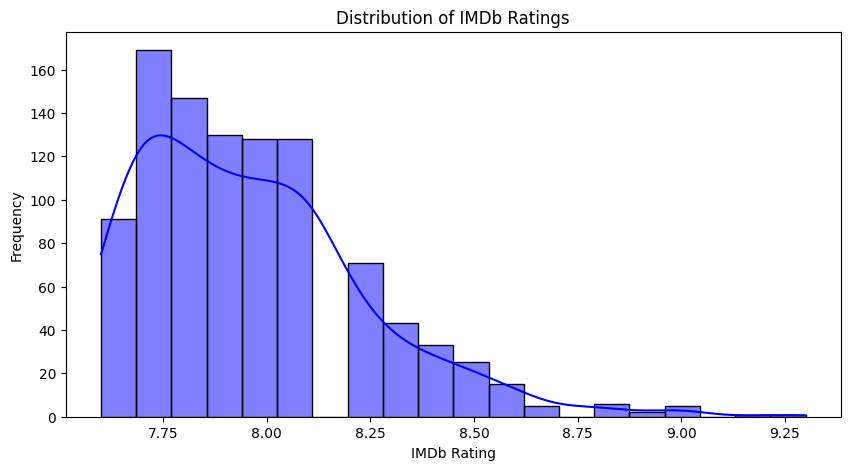

In [ ]:
# 1. Distribution of IMDb Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['Movie Rating'], kde=True, bins=20, color='blue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Frequency")
plt.show()

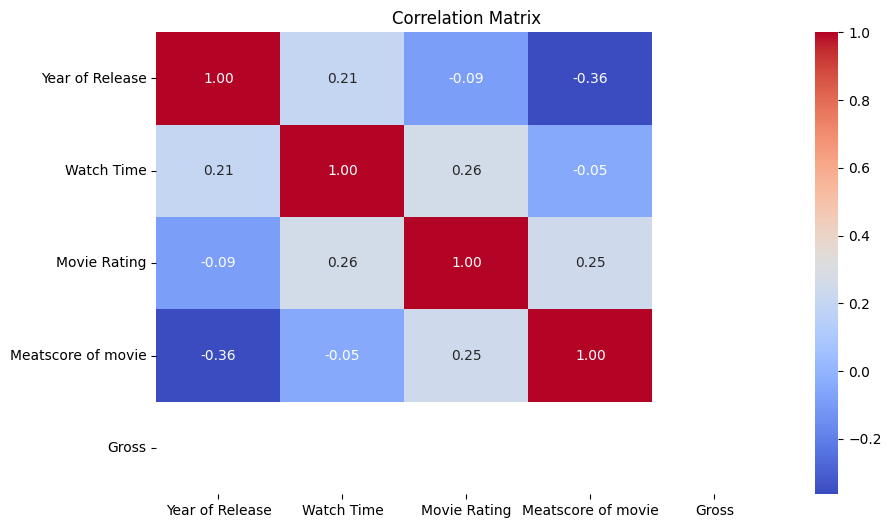

In [ ]:
# 2. Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-26-71845164f27f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movies, x='Movie Rating', y='Movie Name', palette='viridis')


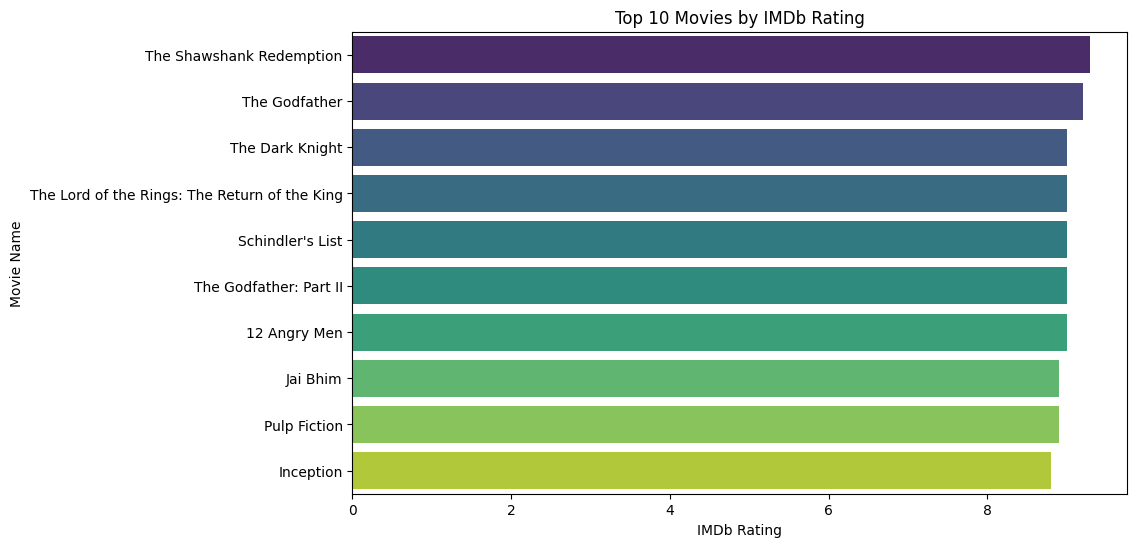

In [ ]:
# 3. Top 10 Movies by IMDb Rating
top_movies = df.nlargest(10, 'Movie Rating')[['Movie Name', 'Movie Rating']]
plt.figure(figsize=(10, 6))
sns.barplot(data=top_movies, x='Movie Rating', y='Movie Name', palette='viridis')
plt.title("Top 10 Movies by IMDb Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Movie Name")
plt.show()


<ipython-input-28-1f78cc8adc06>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Year of Release', palette='mako', order=df['Year of Release'].value_counts().index[:20])


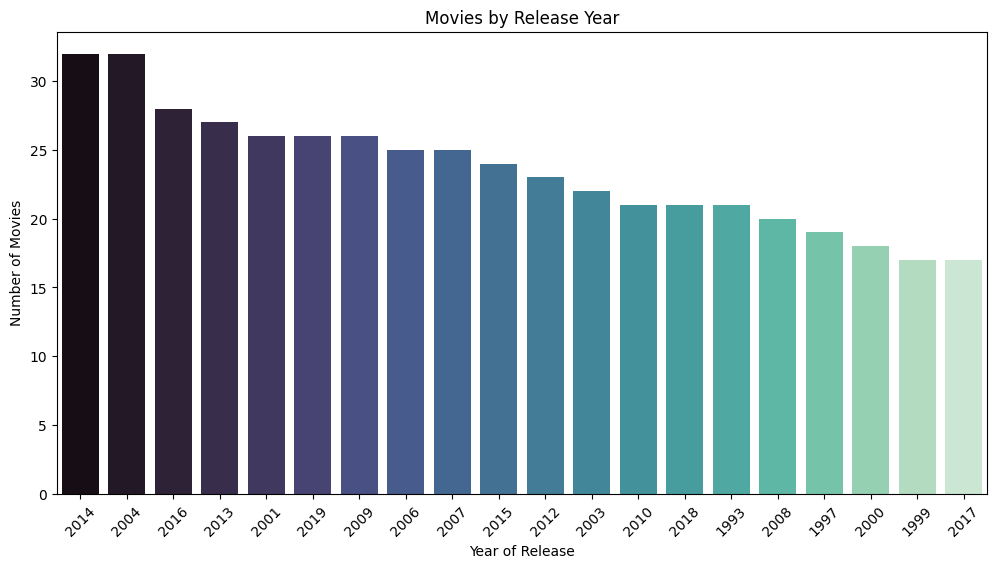

In [ ]:
# 4. Movies by Release Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year of Release', palette='mako', order=df['Year of Release'].value_counts().index[:20])
plt.xticks(rotation=45)
plt.title("Movies by Release Year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Movies")
plt.show()

Outlier Detection


---
Outlier detection involves identifying data points that deviate significantly from the majority of data in a dataset. These anomalies can arise due to errors, rare occurrences, or legitimate extreme values. Outliers can skew statistical analyses and impact the performance of machine learning models, making their detection and handling important.


In [ ]:
#detecting outliers
from scipy.stats import zscore

Interquartile Range (IQR)
The Interquartile Range (IQR) is a measure of statistical dispersion, or in simple terms, it is the range within which the middle 50% of the data points lie. It is used to understand the spread of the central portion of a dataset.

---


The quantile function is a statistical function that is used to determine the value below which a given percentage of data points fall in a dataset.

In [ ]:
# Outlier Detection using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [ ]:
# Outlier Detection using Z-Score
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    abs_z_scores = np.abs(z_scores)
    outliers = data[abs_z_scores > threshold]
    return outliers

In [ ]:
# Detecting outliers in 'Gross' using Z-Score
outliers_gross = detect_outliers_zscore(df, 'Gross')
print("Outliers in Gross (Z-Score):\n", outliers_gross)

# Detecting outliers in 'Movie Rating' using IQR
outliers_rating = detect_outliers_iqr(df, 'Movie Rating')
print("Outliers in Movie Rating (IQR):\n", outliers_rating)

Outliers in Gross (Z-Score):
 Empty DataFrame
Columns: [Movie Name, Year of Release, Watch Time, Movie Rating, Meatscore of movie, Votes, Gross, Description]
Index: []
Outliers in Movie Rating (IQR):
                                            Movie Name  Year of Release  \
0                            The Shawshank Redemption             1994   
1                                       The Godfather             1972   
2                                     The Dark Knight             2008   
3       The Lord of the Rings: The Return of the King             2003   
4                                    Schindler's List             1993   
5                              The Godfather: Part II             1974   
6                                        12 Angry Men             1957   
7                                            Jai Bhim             2021   
8                                        Pulp Fiction             1994   
9                                           Inception      

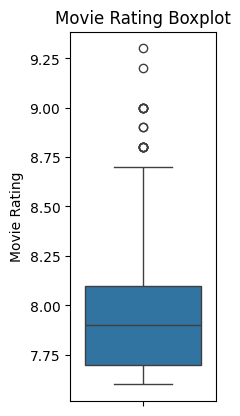

In [ ]:
# Visualizing Outliers using Boxplot only for movie rating
plt.subplot(1, 3, 3)
sns.boxplot(df['Movie Rating'])
plt.title("Movie Rating Boxplot")
plt.show()

We can check and plot outliers for every column but in the avove code i have only done it for 2 columns.

---



Feature Engineering

---
Feature Engineering is the process of transforming raw data into meaningful features that can be used by machine learning models to improve their predictive performance. It involves creating new features, modifying existing ones, or removing irrelevant ones to better capture the patterns and relationships in the data.


---




We don't need to perform feature engineering as it is a very specific requirement which is only performed as per request or need.